In [15]:
import numpy as np 
import sys
sys.path.append('../')
import src.preprocessing as prep
import matplotlib.pyplot as plt
lossCurve = []

In [16]:
def sigmoid(x, deriv=False):
    if(deriv==True):
        return x*(1.0 - x)
    return 1.0/(1.0 + np.exp(-x))

class LogitRegression:
    def __init__(self, input, learn_rate = 0.00001):
        self.learn_rate = learn_rate 
        self.X = input
        self.M = self.X.shape[0] # size of datas
        self.N = self.X.shape[1] # size of 1 data
        self.W = np.random.randn(self.N,1)
        self.b = np.zeros((1,1)) 
        train_times = 1000
        self.batch_size =int(self.M/train_times)
        
    def predict(self, x):#x=input
        return sigmoid(np.dot(x,self.W))+self.b

    def train(self, y, epoch = 100):#y=expected    
        r=0
        dNLL=0.0
        for j in range(epoch):
            for l in range(0, self.M, self.batch_size):
                if(l+self.batch_size>self.M): 
                    r = self.M
                else: 
                    r = l+self.batch_size
                error = sigmoid(np.dot(self.X[l:r],self.W)) - y[l:r]
                dNLL = np.dot(self.X.T[:,l:r], error)              #dNLL: (N,1).(1,1) = N,1)
                self.W = self.W - self.learn_rate*dNLL                #w: (N,1)
                if(l%1000==0): 
                    lossCurve.append(np.sum(error))
                    print("BatchL",l," Loss:", np.sum(error))
            if(j%4==0):
                print("epoch:",j, "Loss:", 0)
        return self.W, self.b# return for saving purpose 


In [17]:
#Data proprocessing 
X_train, Y_train, X_test, Y_test = prep.preprocess()


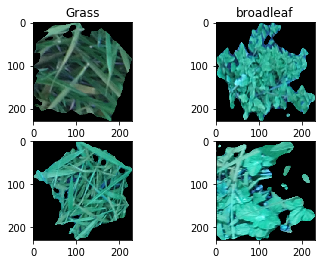

In [18]:
# Visualize some images 
classes = ["Grass", "broadleaf"]
n_class = len(classes)
samples_per_class = 2


for y, cls in enumerate(classes):
    idxes = np.flatnonzero(Y_train == y)
    idxes = np.random.choice(idxes, samples_per_class, replace = False)
    for i, idx in enumerate(idxes):
        plt_idx = i * n_class + y + 1
        plt.subplot(samples_per_class,n_class, plt_idx)
        plt.imshow(X_train[idx])
        if(i==0): plt.title(cls)

plt.show()

In [19]:
print("X_train shape", X_train.shape, "| Y_train shape:", Y_train.shape)
print("X_test shape", X_test.shape, "| Y_test shape:", Y_test.shape)

print("\nshape...")
X_train = np.reshape(X_train, (X_train.shape[0],-1))# -1 -> 32*32*3 = 3072
X_test = np.reshape(X_test, (X_test.shape[0],-1))# -1 -> 32*32*3 = 3072
print("X_train shape", X_train.shape, "| Y_train shape:", Y_train.shape)
print("X_test shape", X_test.shape, "| Y_test shape:", Y_test.shape)

X_train shape (4511, 230, 230, 3) | Y_train shape: (4511, 1)
X_test shape (200, 230, 230, 3) | Y_test shape: (200, 1)

shape...
X_train shape (4511, 158700) | Y_train shape: (4511, 1)
X_test shape (200, 158700) | Y_test shape: (200, 1)


In [20]:
LR = LogitRegression(X_train)
weight, bias = LR.train( Y_train, epoch = 2)
np.savetxt('Weight', weight, delimiter=',')

BatchL 0  Loss: 4.0


c:\users\dnguyen52\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


BatchL 1000  Loss: -2.0
BatchL 2000  Loss: 0.0
BatchL 3000  Loss: -1.0
BatchL 4000  Loss: 0.0
epoch: 0 Loss: 0
BatchL 0  Loss: 0.0
BatchL 1000  Loss: -2.0
BatchL 2000  Loss: 0.0
BatchL 3000  Loss: 0.0
BatchL 4000  Loss: 0.0


In [21]:
lossCurve = [abs(i) for i in lossCurve]

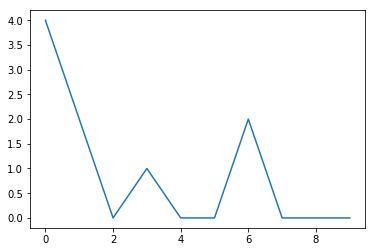

In [22]:
plt.plot(lossCurve)

In [44]:
#predict 
pred = LR.predict(X_test).astype(int)

correct = 0 
for i in range(pred.shape[0]):
    if(pred[i] == Y_test[i]):
        correct += 1 
        
print("Accuracy:", correct/200)#200: n_test

Accuracy: 0.56


c:\users\dnguyen52\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
